In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("dataset.csv")
data.head()

,Wife's age,Wife's education,Husband's education,Number of children,Wife's religion,Wife is working,Husband's occupation,SLI,Media exposure,CMC
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [3]:
y = data.CMC
X = data.drop('CMC',axis = 1)

In [4]:
X.head()

,Wife's age,Wife's education,Husband's education,Number of children,Wife's religion,Wife is working,Husband's occupation,SLI,Media exposure
0,24,2,3,3,1,1,2,3,0
1,45,1,3,10,1,1,3,4,0
2,43,2,3,7,1,1,3,4,0
3,42,3,2,9,1,1,3,3,0
4,36,3,3,8,1,1,3,2,0


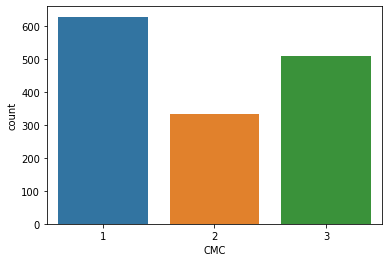

In [5]:
ax = sns.countplot(y,label="Count")

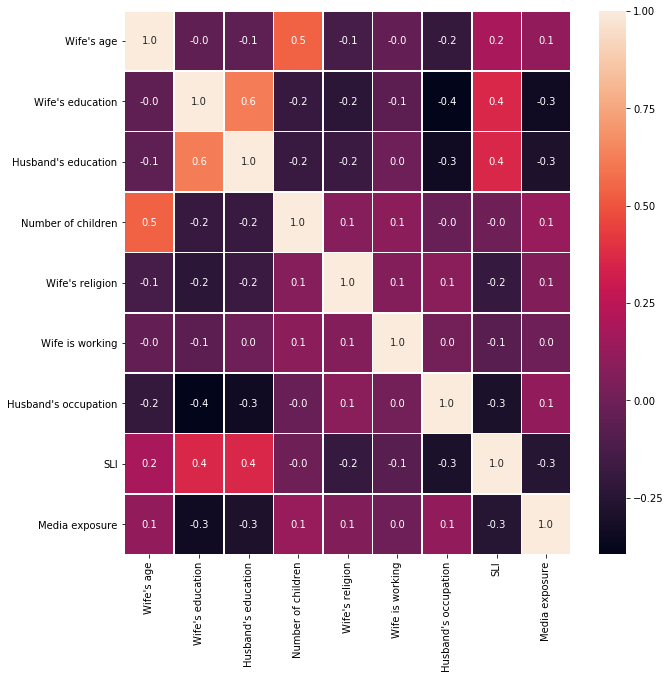

In [6]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

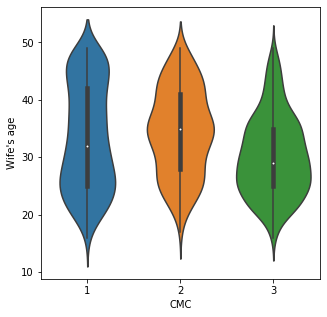

In [7]:
fig, ax = plt.subplots(figsize=(5,5))
sns.violinplot(x="CMC", y="Wife's age", data=data)

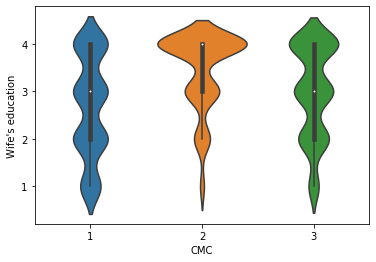

In [8]:
sns.violinplot(x="CMC", y="Wife's education", data=data)

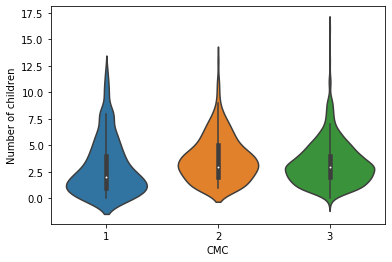

In [9]:
sns.violinplot(x="CMC", y="Number of children", data=data)

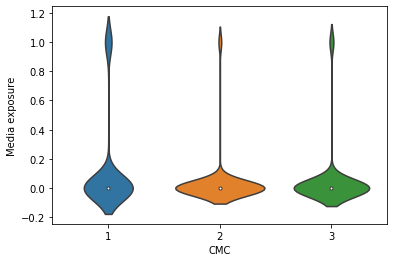

In [10]:
sns.violinplot(x="CMC", y="Media exposure", data=data)

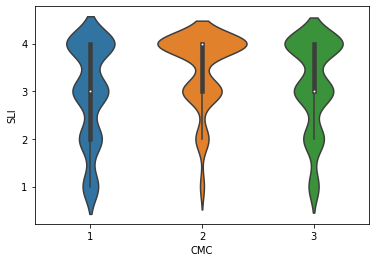

In [11]:
sns.violinplot(x="CMC", y="SLI", data=data)

(array([ 36., 135., 185., 250., 174., 167., 186., 108., 114., 118.]),
 array([16. , 19.3, 22.6, 25.9, 29.2, 32.5, 35.8, 39.1, 42.4, 45.7, 49. ]),
 <a list of 10 Patch objects>)

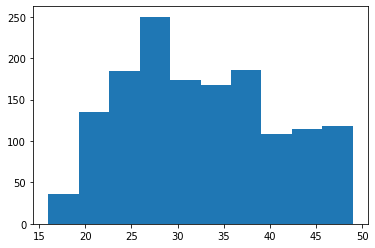

In [12]:
plt.hist(data["Wife's age"])

In [13]:
X1 = X
y1 = y

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(X1, y1)  #1,2,4,9,8

In [15]:
print('Score list:', select_feature.scores_)
print('Feature list:', X1.columns)

Score list: [132.68028116  45.64613752   9.48391126  45.12805438   3.22934311
   1.29943087  18.13612755  18.39981677  29.23597734]
Feature list: Index(['Wife's age', 'Wife's education', 'Husband's education',
       'Number of children', 'Wife's religion', 'Wife is working',
       'Husband's occupation', 'SLI', 'Media exposure'],
      dtype='object')


In [16]:
X_chi = select_feature.transform(X)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_chi = sc.fit_transform(X_chi)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_chi, y1, test_size = 0.3, random_state = 0)

In [19]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 2)
classifier.fit(X_train,y_train)

C:\Users\Indranil\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=2,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
y_pred = classifier.predict(X_test)

Accuracy is %: 55.42986425339367


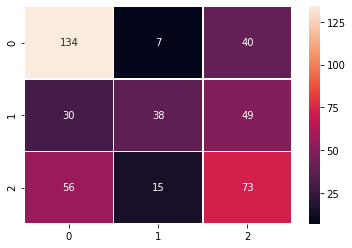

In [21]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test,y_pred)
print("Accuracy is %:" ,ac*100)

cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm,annot=True,linewidth=.5,fmt="d")

In [22]:
X2 = X
y2 = y

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X2 = pca.fit_transform(X2)
explained_variance = pca.explained_variance_ratio_

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_pca = sc.fit_transform(X2)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y2, test_size = 0.25, random_state = 2)

In [26]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf',random_state = 2)
classifier.fit(X_train,y_train)

C:\Users\Indranil\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=2,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred2 = classifier.predict(X_test)

Accuracy is %: 58.265582655826556


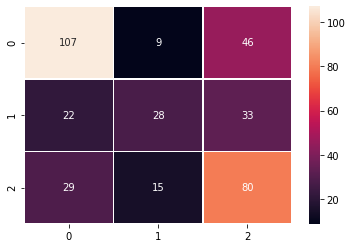

In [28]:
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
ac2 = accuracy_score(y_test,y_pred2)
print("Accuracy is %:" ,ac2*100)

cm2 = confusion_matrix(y_test,y_pred2)
ax = sns.heatmap(cm2,annot=True,linewidth=.5,fmt="d")